<a href="https://colab.research.google.com/github/Nourhan-Adell/DeepLearning/blob/main/NLP_in_TF/IMDB_Reiews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Get the Dataset**

In [5]:
# Import the dataset from tensorflow packages
import tensorflow_datasets as tfds
imdb_data, info= tfds.load('imdb_reviews', with_info= True, as_supervised= True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteNVIT5P/imdb_reviews-train.tfrecord*...…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteNVIT5P/imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteNVIT5P/imdb_reviews-unsupervised.tfrec…

Dataset imdb_reviews downloaded and prepared to ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


### **Split the dataset**

In [6]:
# Split the data into train and test sets (25,000, 25,000)
import numpy as np
train_data, test_data= imdb_data['train'], imdb_data['test']

In [8]:
# Initialize sentences and labels lists
training_sentences= []
training_labels= []

testing_sentences= []
testing_labels= []

# Loop over all training examples and save the sentences and labels
for sentence, label in train_data:
  training_sentences.append(sentence.numpy().decode('utf8'))    
  training_labels.append(label.numpy())

# Loop over all testing examples and save the sentences and labels
for sentence, label in test_data:
  testing_sentences.append(sentence.numpy().decode('utf8'))
  testing_labels.append(label.numpy())

**sentence.numpy**: 
- we use it because the data which are extracted are tensors, so by calling numpy method we are actually extract their value.

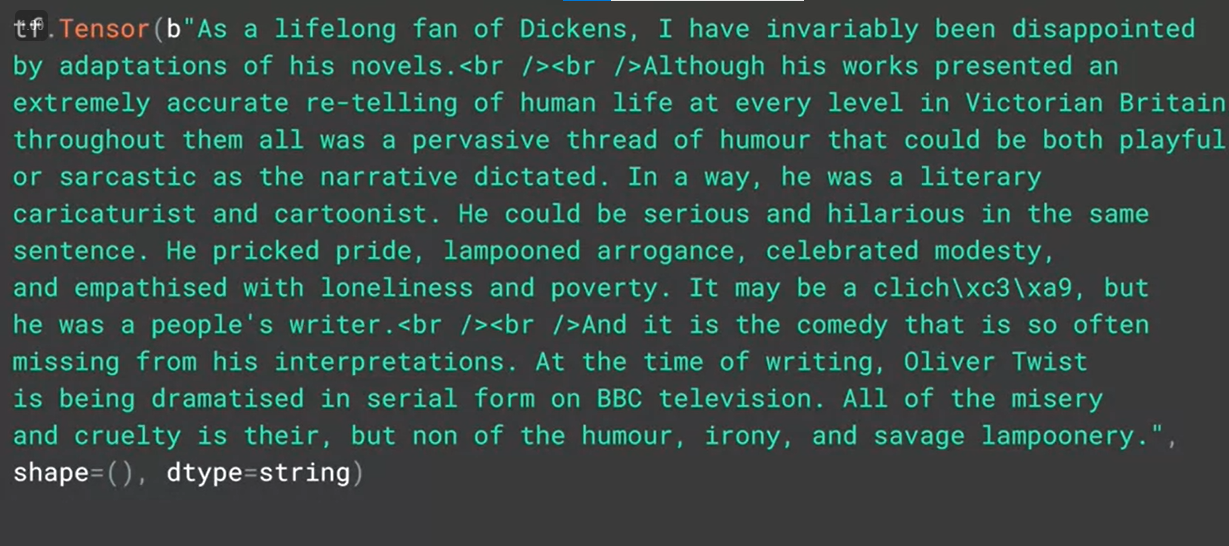

In [12]:
# Convert labels lists to numpy array
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

### **Generate Padded Sequences**

In [14]:
# Specify the Hyper-Parameters
vocab_size= 10000
embedding_dim= 16
max_length= 120
trunc_type= 'post'
oov_token= '<OOV>'

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the Tokenizer class
tokenizer= Tokenizer(num_words= vocab_size, oov_token= oov_token)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(training_sentences)
word_index= tokenizer.word_index

# # Generate sequences and pad to the training sequences
training_sequences= tokenizer.texts_to_sequences(training_sentences)
training_padd= pad_sequences(training_sequences, maxlen= max_length, truncating= trunc_type)

# Generate sequences and pad to the test sequences
testing_sequences= tokenizer.texts_to_sequences(testing_sentences)
testing_padd= pad_sequences(testing_sequences, maxlen= max_length)

### **Build and Compile the Model**
With the data already preprocessed, you can proceed to building your sentiment classification model. The input will be an **Embedding layer**. The main idea here is to represent each word in your vocabulary with vectors. These vectors have trainable weights so as your neural network learns, words that are most likely to appear in a positive tweet will converge towards similar weights. Similarly, words in negative tweets will be clustered more closely together

In [18]:
model= tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),  #This is the key to text sentiment analysis in tensorflow
                           tf.keras.layers.GlobalAveragePooling1D(),    # It's like the flatten layer, but it's simpler and faster  
                           tf.keras.layers.Dense(6, activation='relu'),
                           tf.keras.layers.Dense(1, activation= 'sigmoid')
                           ])

**Sentiment Analysis Meaning:**
Words in a sentence and often words that have similar meanings are close to each other.

In [21]:
model.compile(loss='binary_crossentropy',optimizer= 'adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_2 (Dense)             (None, 6)                 102       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


### **Train the Model**

In [23]:
num_epochs= 10
model.fit(training_padd,
          training_labels_final,
          epochs= num_epochs,
          validation_data= (testing_padd, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 7s 7ms/step - loss: 0.5834 - accuracy: 0.7002 - val_loss: 0.4047 - val_accuracy: 0.8358
Epoch 2/10
782/782 [==============================] - 6s 7ms/step - loss: 0.3462 - accuracy: 0.8578 - val_loss: 0.3333 - val_accuracy: 0.8570
Epoch 3/10
782/782 [==============================] - 6s 7ms/step - loss: 0.2821 - accuracy: 0.8856 - val_loss: 0.3261 - val_accuracy: 0.8598
Epoch 4/10
782/782 [==============================] - 5s 7ms/step - loss: 0.2454 - accuracy: 0.9038 - val_loss: 0.3345 - val_accuracy: 0.8559
Epoch 5/10
782/782 [==============================] - 5s 7ms/step - loss: 0.2181 - accuracy: 0.9171 - val_loss: 0.3491 - val_accuracy: 0.8532
Epoch 6/10
782/782 [==============================] - 5s 7ms/step - loss: 0.1961 - accuracy: 0.9275 - val_loss: 0.3694 - val_accuracy: 0.8484
Epoch 7/10
782/782 [==============================] - 5s 7ms/step - loss: 0.1790 - accuracy: 0.9358 - val_loss: 0.3930 - val_accuracy: 0.8429
Epoch 

### **Visualize Word Embeddings**

In [24]:
e = model.layers[0]
weights= e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [31]:
# Reverse the word_inde to be aple to plot them
reversed_word_index= tokenizer.index_word
print(f'Word_index: {word_index}')

Word_index: {'<OOV>': 1, 'the': 2, 'and': 3, 'a': 4, 'of': 5, 'to': 6, 'is': 7, 'br': 8, 'in': 9, 'it': 10, 'i': 11, 'this': 12, 'that': 13, 'was': 14, 'as': 15, 'for': 16, 'with': 17, 'movie': 18, 'but': 19, 'film': 20, 'on': 21, 'not': 22, 'you': 23, 'are': 24, 'his': 25, 'have': 26, 'he': 27, 'be': 28, 'one': 29, 'all': 30, 'at': 31, 'by': 32, 'an': 33, 'they': 34, 'who': 35, 'so': 36, 'from': 37, 'like': 38, 'her': 39, 'or': 40, 'just': 41, 'about': 42, "it's": 43, 'out': 44, 'if': 45, 'has': 46, 'some': 47, 'there': 48, 'what': 49, 'good': 50, 'more': 51, 'when': 52, 'very': 53, 'up': 54, 'no': 55, 'time': 56, 'she': 57, 'even': 58, 'my': 59, 'would': 60, 'which': 61, 'only': 62, 'story': 63, 'really': 64, 'see': 65, 'their': 66, 'had': 67, 'can': 68, 'were': 69, 'me': 70, 'well': 71, 'than': 72, 'we': 73, 'much': 74, 'been': 75, 'bad': 76, 'get': 77, 'will': 78, 'do': 79, 'also': 80, 'into': 81, 'people': 82, 'other': 83, 'first': 84, 'great': 85, 'because': 86, 'how': 87, 'him':

In [32]:
print(f'Reversed_word_index: {reversed_word_index}')

Reversed_word_index: {1: '<OOV>', 2: 'the', 3: 'and', 4: 'a', 5: 'of', 6: 'to', 7: 'is', 8: 'br', 9: 'in', 10: 'it', 11: 'i', 12: 'this', 13: 'that', 14: 'was', 15: 'as', 16: 'for', 17: 'with', 18: 'movie', 19: 'but', 20: 'film', 21: 'on', 22: 'not', 23: 'you', 24: 'are', 25: 'his', 26: 'have', 27: 'he', 28: 'be', 29: 'one', 30: 'all', 31: 'at', 32: 'by', 33: 'an', 34: 'they', 35: 'who', 36: 'so', 37: 'from', 38: 'like', 39: 'her', 40: 'or', 41: 'just', 42: 'about', 43: "it's", 44: 'out', 45: 'if', 46: 'has', 47: 'some', 48: 'there', 49: 'what', 50: 'good', 51: 'more', 52: 'when', 53: 'very', 54: 'up', 55: 'no', 56: 'time', 57: 'she', 58: 'even', 59: 'my', 60: 'would', 61: 'which', 62: 'only', 63: 'story', 64: 'really', 65: 'see', 66: 'their', 67: 'had', 68: 'can', 69: 'were', 70: 'me', 71: 'well', 72: 'than', 73: 'we', 74: 'much', 75: 'been', 76: 'bad', 77: 'get', 78: 'will', 79: 'do', 80: 'also', 81: 'into', 82: 'people', 83: 'other', 84: 'first', 85: 'great', 86: 'because', 87: 'how

**Write the Vectors and meta data out of files**
Thus, to be able to visualize them


In [33]:
import io

out_v= io.open('vecs.tsv', 'w', encoding='utf-8')
out_m= io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range(1, vocab_size):
  word= reversed_word_index[word_num]
  embeddings= weights[word_num]
  out_m.write(word +'\n')
  out_v.write('\t'.join([str(x) for x in embeddings]) +'\n')

out_v.close()
out_m.close() 

In [34]:
try:
  from google.colab import files
except:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Run The two files on [embedding projector](https://projector.tensorflow.org/)**